# Week 2 Challenge

### Importing the required libraries

In [21]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, mean_squared_error
from sqlalchemy import create_engine
import sqlite3
import psycopg2

In [22]:
path = r"C:\Users\doff n\Desktop\doffneri\week2\src\data\telecom.sql"

### Reading the data from the CSV

In [14]:
df = pd.read_csv(r"C:\Users\doff n\Desktop\doffneri\week2\src\data\Week2_challenge_data_source(CSV).csv")

df.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


## Identifying top 10 handsets

Top 10 handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


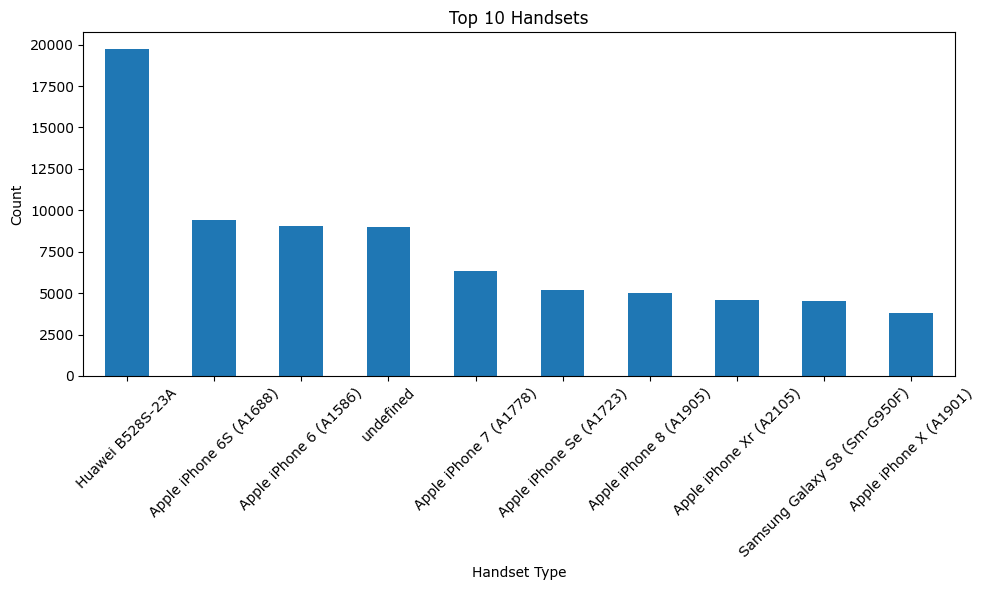

In [15]:
top_10_handsets = df['Handset Type'].value_counts().nlargest(10)
print("Top 10 handsets:")
print(top_10_handsets)

# Visualize
plt.figure(figsize=(10, 6))
top_10_handsets.plot(kind='bar')
plt.title('Top 10 Handsets')
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Identify top 3 handset manufacturers

Top 3 handset manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


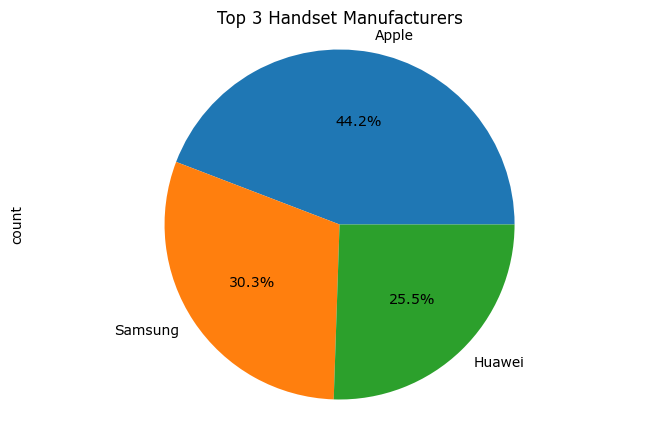

In [16]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().nlargest(3)
print("Top 3 handset manufacturers:")
print(top_3_manufacturers)

# Visualize
plt.figure(figsize=(8, 5))
top_3_manufacturers.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 3 Handset Manufacturers')
plt.axis('equal')
plt.show()

## Identify top 5 handsets per top 3 handset manufacturer


Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64


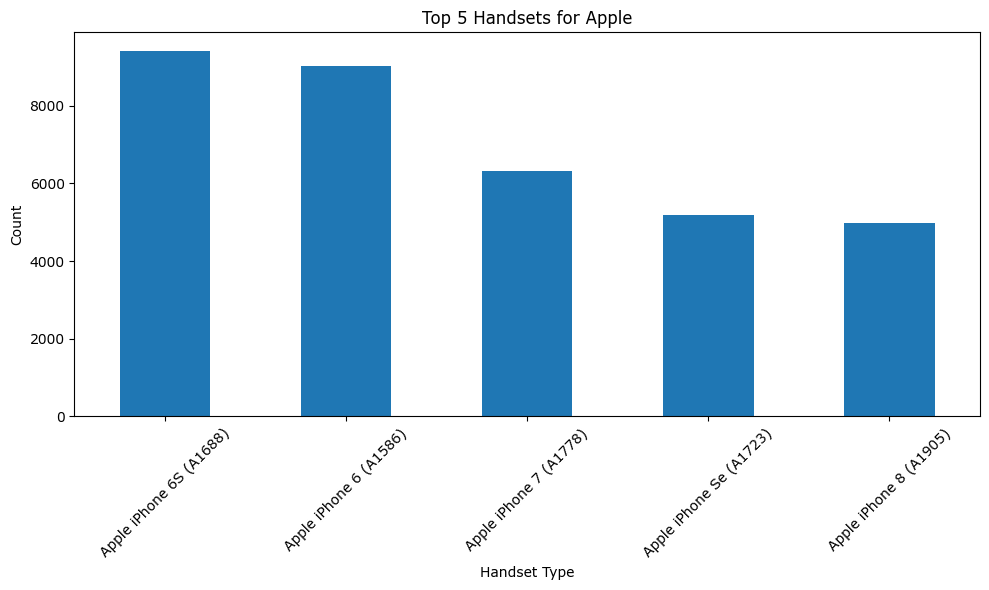


Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64


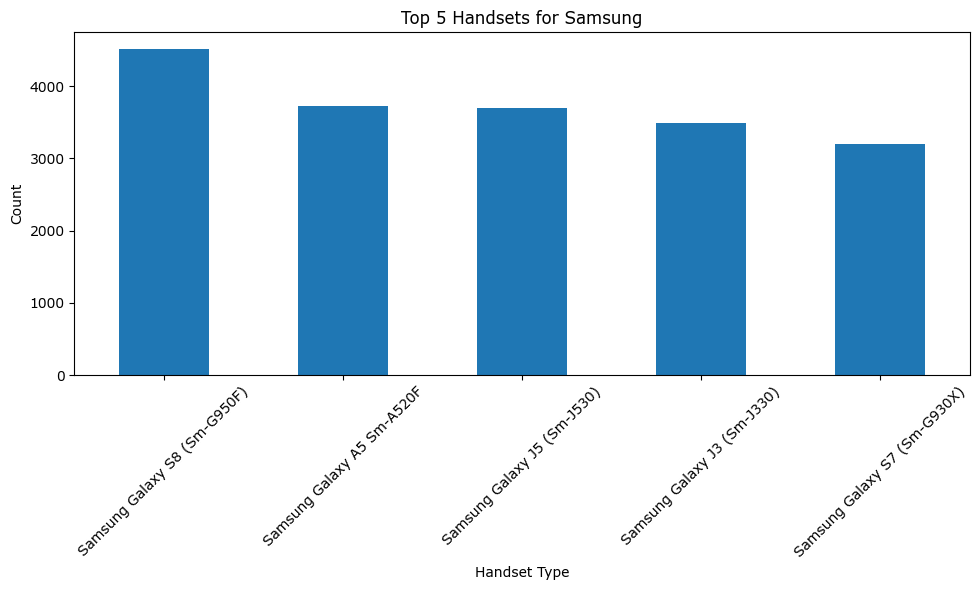


Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


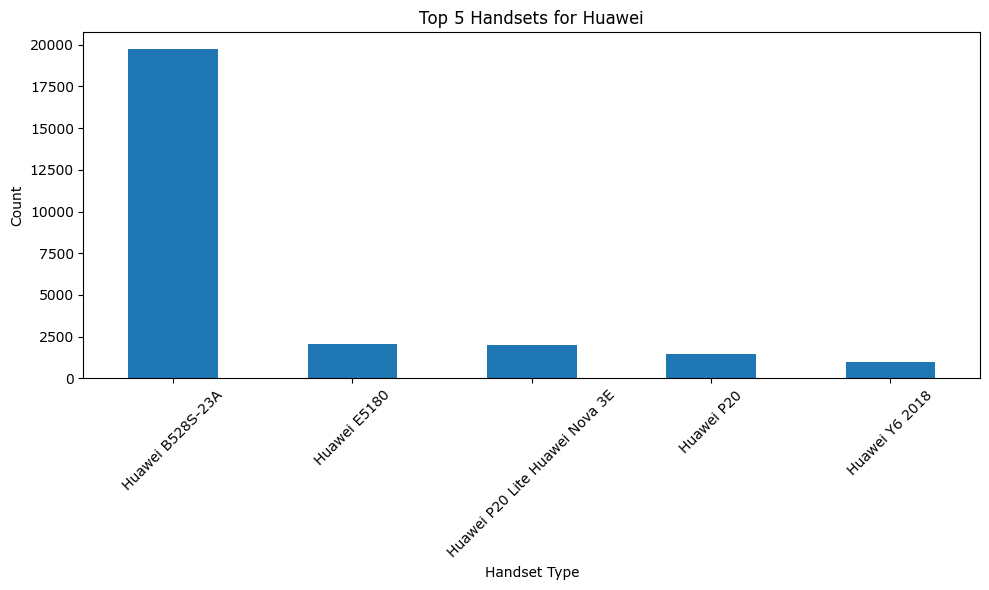

In [17]:
for manufacturer in top_3_manufacturers.index:
    top_5_handsets = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().nlargest(5)
    print(f"\nTop 5 handsets for {manufacturer}:")
    print(top_5_handsets)
    
    # Visualize
    plt.figure(figsize=(10, 6))
    top_5_handsets.plot(kind='bar')
    plt.title(f'Top 5 Handsets for {manufacturer}')
    plt.xlabel('Handset Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Aggregate user information

In [25]:
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [26]:
user_overview = df.groupby('MSISDN/Number').agg({
    'MSISDN/Number': 'count',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).rename(columns={
    'MSISDN/Number': 'Number of xDR sessions',
    'Dur. (ms)': 'Total Duration (ms)',
    'Total DL (Bytes)': 'Total Download (Bytes)',
    'Total UL (Bytes)': 'Total Upload (Bytes)'
})

user_overview['Total Data Volume (Bytes)'] = user_overview['Total Download (Bytes)'] + user_overview['Total Upload (Bytes)']

print(user_overview.head())

               Number of xDR sessions  Total Duration (ms)  \
MSISDN/Number                                                
3.360100e+10                        1             116720.0   
3.360100e+10                        1             181230.0   
3.360100e+10                        1             134969.0   
3.360101e+10                        1              49878.0   
3.360101e+10                        2              37104.0   

               Total Download (Bytes)  Total Upload (Bytes)  \
MSISDN/Number                                                 
3.360100e+10             8.426375e+08            36053108.0   
3.360100e+10             1.207552e+08            36104459.0   
3.360100e+10             5.566597e+08            39306820.0   
3.360101e+10             4.019932e+08            20327526.0   
3.360101e+10             1.363130e+09            94280527.0   

               Total Data Volume (Bytes)  
MSISDN/Number                             
3.360100e+10                8.786906e

## EDA Analysis

Number of xDR sessions         int64
Total Duration (ms)          float64
Total Download (Bytes)       float64
Total Upload (Bytes)         float64
Total Data Volume (Bytes)    float64
dtype: object
       Number of xDR sessions  Total Duration (ms)  Total Download (Bytes)  \
count           106856.000000         1.068560e+05            1.068560e+05   
mean                 1.393792         1.461672e+05            6.336527e+08   
std                  0.806022         1.863587e+05            4.645551e+08   
min                  1.000000         7.142000e+03            8.827082e+06   
25%                  1.000000         7.130800e+04            3.148271e+08   
50%                  1.000000         1.027400e+05            5.703677e+08   
75%                  2.000000         1.727990e+05            8.073645e+08   
max                 18.000000         1.855375e+07            8.156743e+09   

       Total Upload (Bytes)  Total Data Volume (Bytes)  
count          1.068560e+05              

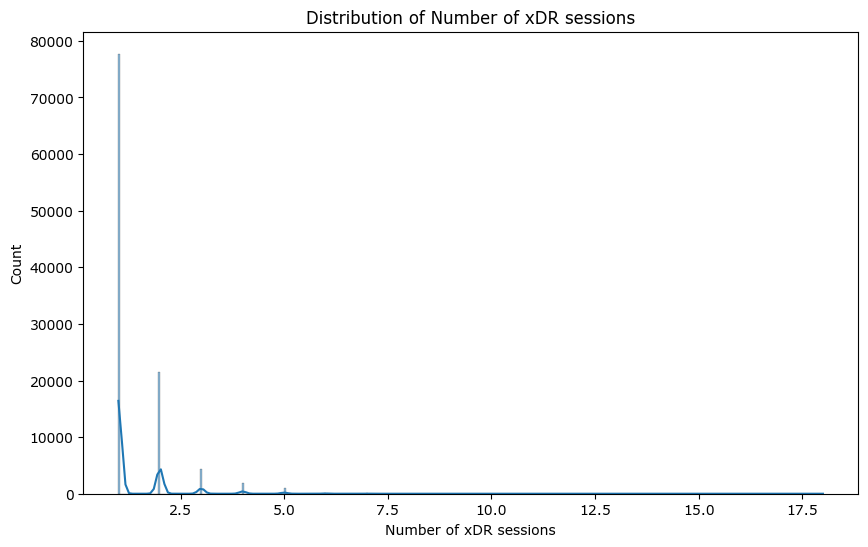

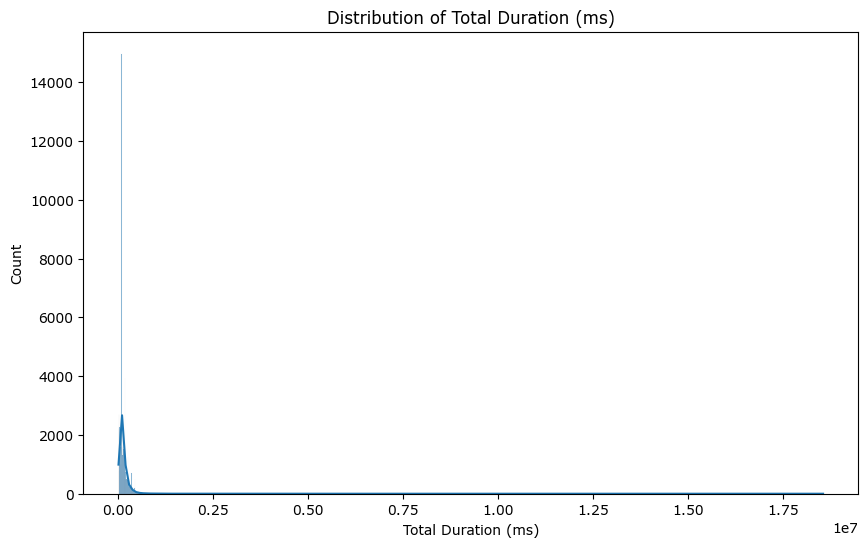

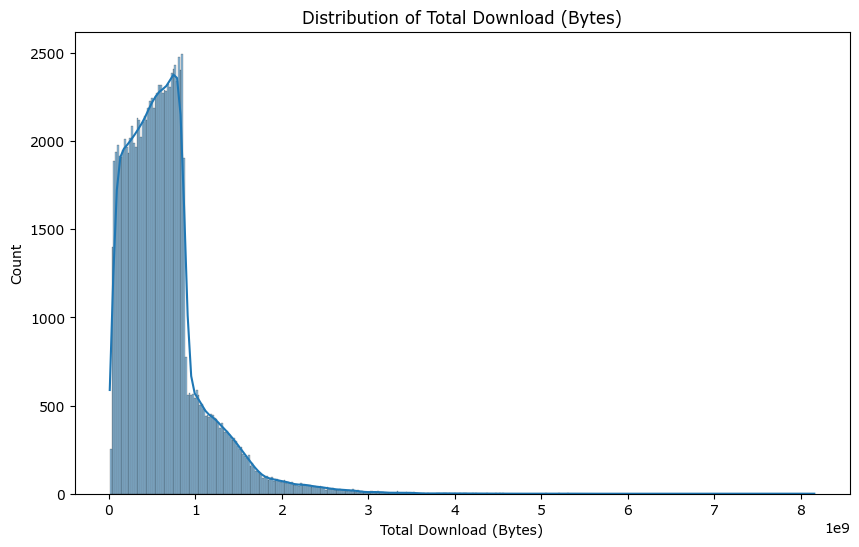

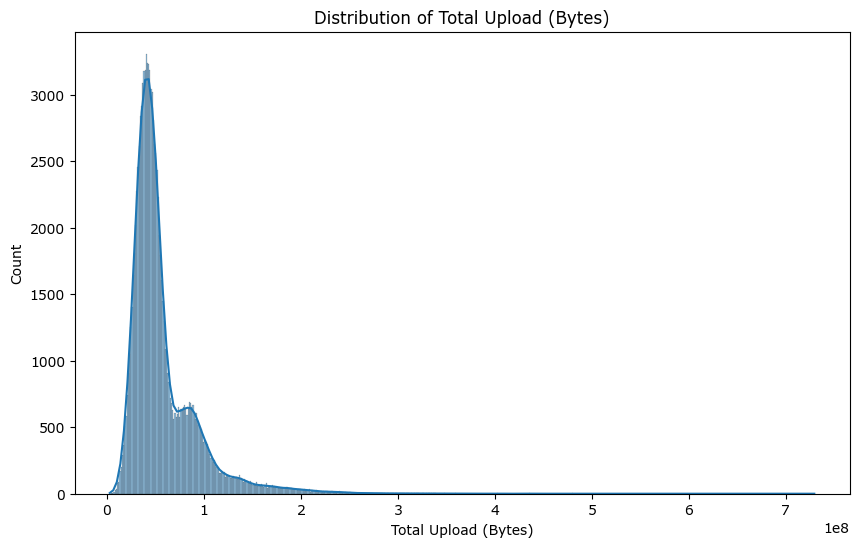

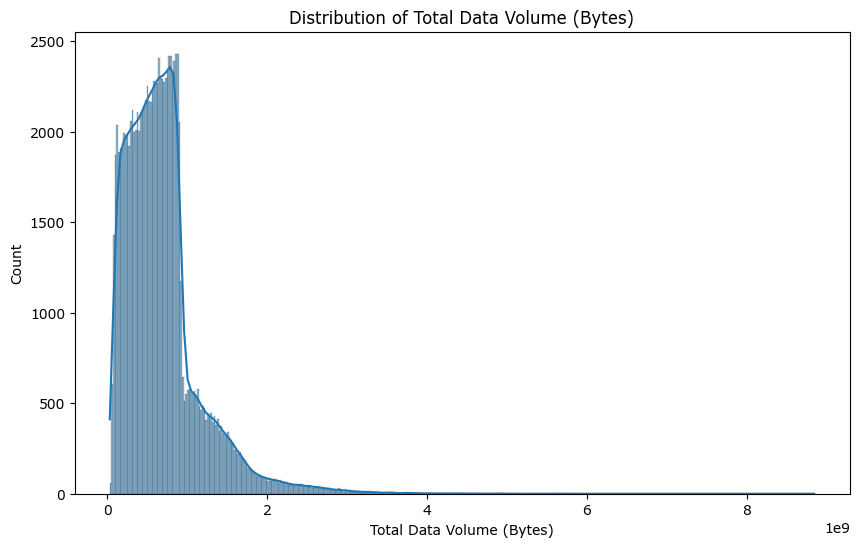

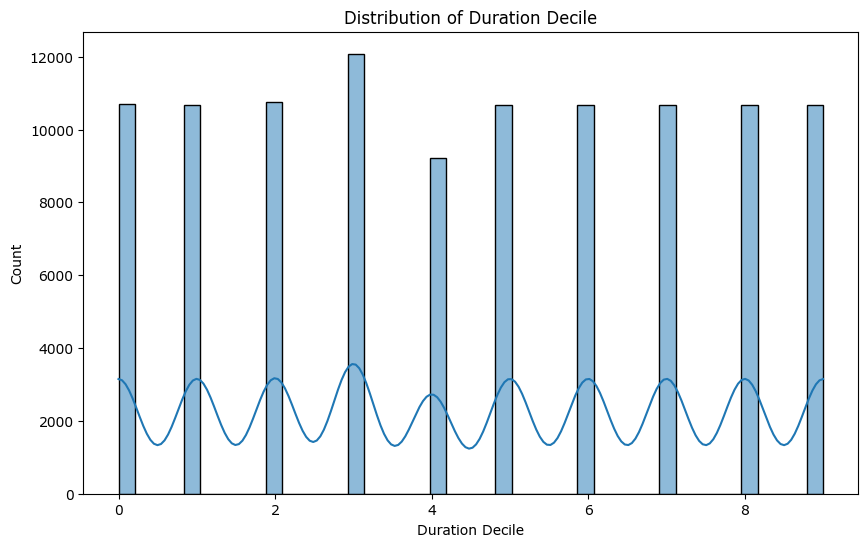

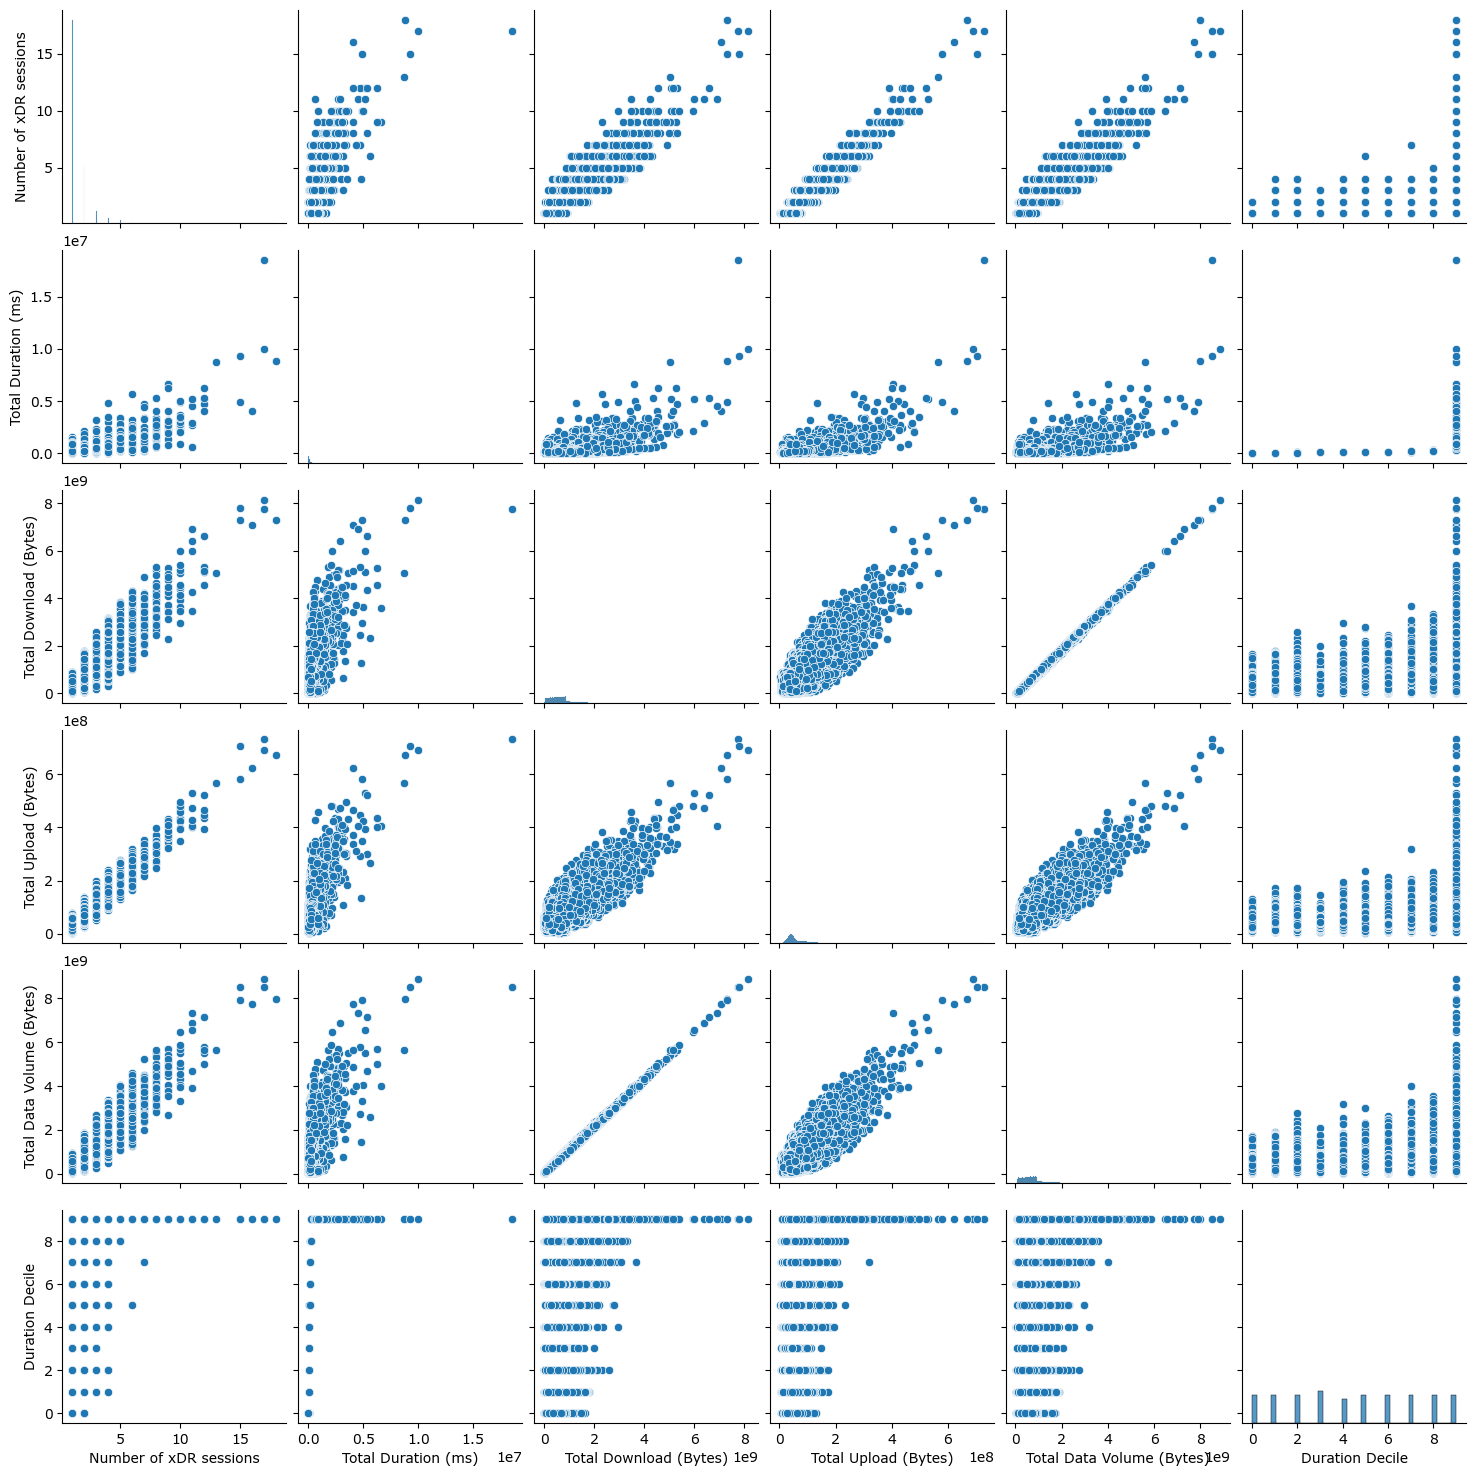

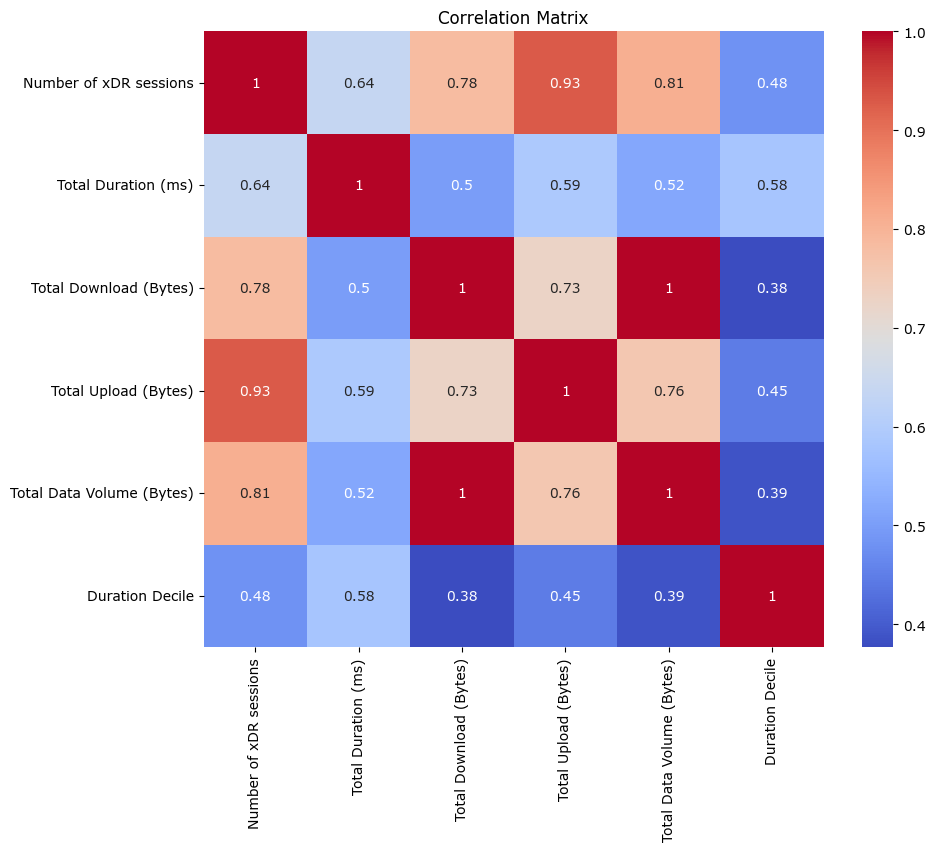

Explained variance ratio:
[7.06644294e-01 1.50330438e-01 7.24130920e-02 5.95538258e-02
 1.10583509e-02 3.70070878e-17]


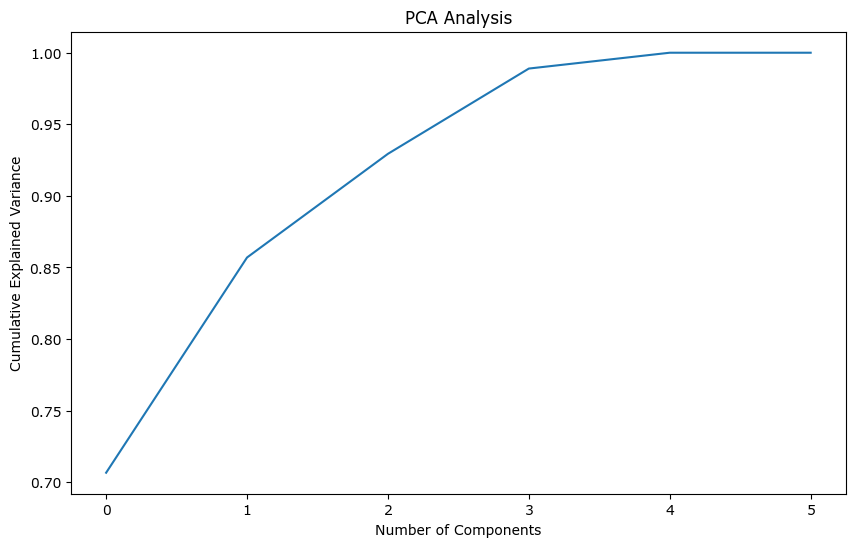

In [27]:
# Describe variables
print(user_overview.dtypes)
print(user_overview.describe())

# Variable transformations
user_overview['Duration Decile'] = pd.qcut(user_overview['Total Duration (ms)'], q=10, labels=False)
decile_data = user_overview.groupby('Duration Decile')['Total Data Volume (Bytes)'].sum()
print("Total data per decile class:")
print(decile_data)

# Non-Graphical Univariate Analysis
print(user_overview.describe())

# Graphical Univariate Analysis
for column in user_overview.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(user_overview[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Bivariate Analysis
sns.pairplot(user_overview)
plt.show()

# Correlation Analysis
correlation_matrix = user_overview.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Dimensionality Reduction
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_overview)

pca = PCA()
pca_result = pca.fit_transform(scaled_data)

print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Analysis')
plt.show()